# Statistical Modeling 

Statistical modeling is a mathematical approach used to represent and analyze the relationships between variables in data. It involves constructing a model that captures the underlying patterns and structures within a dataset, often with the goal of making predictions or understanding the data better.


    Independent variables are also known as: predictor variables, input variables, explanatory variables, features
    
    Dependent variables are also known as: outcome variables, target variables, response variables


## Model Loss

A loss function evaluates how well your model represents the relationship between data variables.



## Simple Linear Regression

The model notation is 

$$y=mx+c$$

or, alternatively

$$y = \beta_0+ \beta_1 x $$

## Calculating M

### The Least-Squares Method

We can calculate $\hat{m}$ (the slope of the best-fit line) using this formula:

$$\hat{m} = \rho \frac{S_y}{S_x}$$

Breaking down those components, we have:

* $\hat{m}$: the estimated slope
* $\rho$: the Pearson correlation, represented by the Greek letter "Rho"
* $S_y$: the standard deviation of the y values
* $S_x$: the standard deviation of the x values

## Calculating C

Then once we have the slope value ($\hat{m}$), we can put it back into our formula $(\hat{y} = \hat{m} x + \hat{c})$ to calculate the intercept. The idea is that

$$\bar{y} = \hat{c} + \hat{m} \bar{x}$$

so

$$\hat{c} = \bar{y} - \hat{m} \bar{x}$$

Breaking down those components, we have:

* $\hat{c}$: the estimated intercept
* $\bar{y}$: the mean of the y values
* $\hat{m}$: the estimated slope
* $\bar{x}$: the mean of the x values

In [98]:
# imports 

import numpy as np 
import seaborn as sns

In [99]:

# X = Independent Variable
X = np.array([1,2,3,4,5,6,8,8,9,10], dtype=np.float64)
# Y = Dependent Variable
Y = np.array([7,7,8,9,9,10,10,11,11,12], dtype=np.float64)

<Axes: >

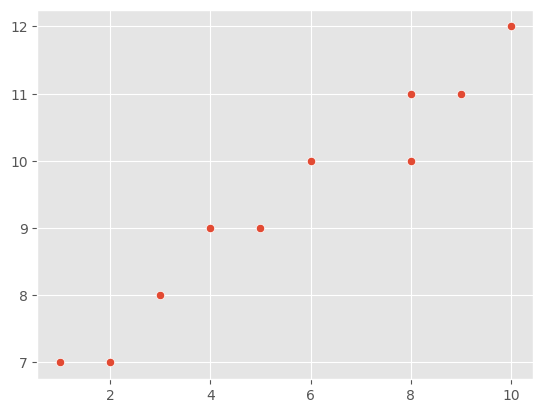

In [100]:
sns.scatterplot(x=X,y=Y)

Write a function `calc_slope` that returns $\hat{m}$ for a given set of x and y data.

The formula is:

$$\hat{m} = \rho \frac{S_y}{S_x}$$

In [101]:
# calculate the slope 

p_corr = np.corrcoef(X,Y)[0][1]
p_corr

np.float64(0.9757242123141516)

In [102]:
std_y = np.std(Y)
std_y

np.float64(1.624807680927192)

In [103]:
std_x = X.std()
std_x

np.float64(2.9393876913398134)

In [104]:
m = p_corr*(std_y/std_x)
m

np.float64(0.5393518518518519)

In [ ]:
def slope(X,Y):
    # corr_coef
    p_corr = np.corrcoef(X,Y)[0][1]
    #std y
    std_y = np.std(Y)
    #std X
    std_x = X.std()
    #m
    m = p_corr*(std_y/std_x)
    return m

In [113]:
m = slope(X,Y)
m

np.float64(0.5393518518518519)

## Calculating the Intercept

Now that we have our estimated slope $\hat{m}$, we can calculate the estimated intercept $\hat{c}$.

As a reminder, the calculation for the best-fit line's y-intercept is:

$$\hat{c} = \bar{y} - \hat{m} \bar{x}$$

Write a function `calc_intercept` that returns $\hat{c}$ for a given $\hat{m}$, x, and y.


In [111]:
Y_mean = Y.mean()
Y_mean

np.float64(9.4)

In [112]:
X_mean = np.mean(X)
X_mean

np.float64(5.6)

In [116]:
# calculate the intecept
c = Y_mean - (X_mean*m)
c

np.float64(6.37962962962963)

In [117]:
def get_c(X,Y):
    #y mean
   Y_mean = Y.mean() 
   #x_mean
   X_mean = np.mean(X)
   
   m = slope(X,Y)
   
   c = Y_mean - (X_mean*m)
   
   return c
   

In [118]:
get_c(X,Y)

np.float64(6.37962962962963)

## Predicting a datapoint 

In [124]:
# to predict a data point 
y = 1000*slope(X,Y)+get_c(X,Y)
y

np.float64(545.7314814814815)

<Axes: >

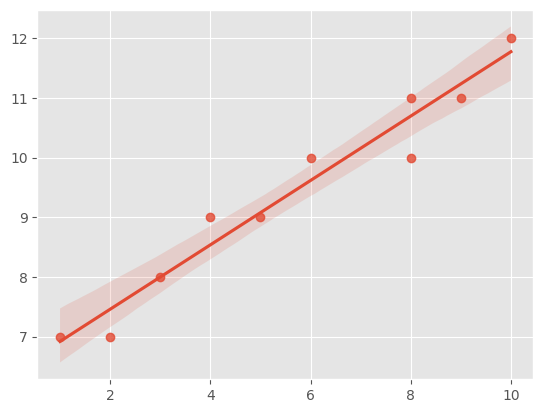

In [123]:
sns.regplot(x=X,y=Y)

# Todo

In [109]:
# make a model for sales and any other column in the provided dataset